In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [146]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

### Фиксированное $P$

Составим графики зависимости $T(N)$, $S(N)$, $E(N)$ при фиксированном $P$.

$P = 2$

В bash:

`$: for N in 10 20 30 40 50 100 150 200 500 1000 2000 5000 10000 50000 100000; do for i in {1..5}; do echo "N = $N, i = $i"; ./monte_best 0 100 50 $N 0.5 2; done; done`

In [147]:
LOG_FILENAME = 'stats_const_p.txt'
col_names = ['pB', 't', 'T', 'a', 'b', 'x', 'N', 'p', 'P']
data = pd.read_csv(LOG_FILENAME, sep=' ', error_bad_lines=False,
warn_bad_lines=False, encoding='utf8', names=col_names)

data['T'] = data['T'].apply(lambda x: float(x[:-1]))

In [148]:
N = np.array([10, 20, 30, 40, 50, 100, 150, 200, 500, 1000, 2000, 5000, 10000, 50000, 100000])

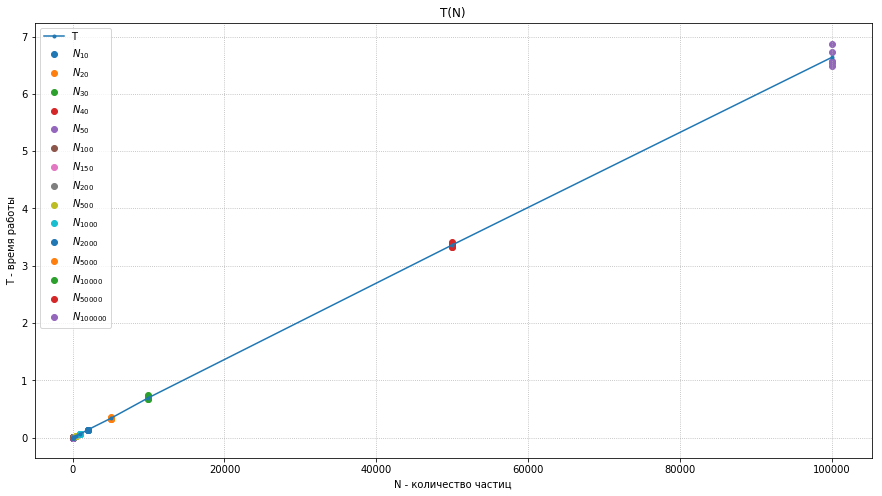

In [150]:
plt.figure(figsize=(15, 8))

T_means = []
i = 0
for datap in chunks(data['T'], 5):
    plt.scatter([N[i]]*5, datap, label="$N_{%i}$" % N[i])
    T_means.append(np.mean(datap))
    i += 1
    
plt.plot(N, T_means, '.-', label = 'T')

plt.xlabel('N - количество частиц')
plt.ylabel('T - время работы')
plt.title('T(N)')
plt.grid(ls=':')
plt.legend()
plt.show()

In [151]:
S = T_means[0] / T_means
E = S / N

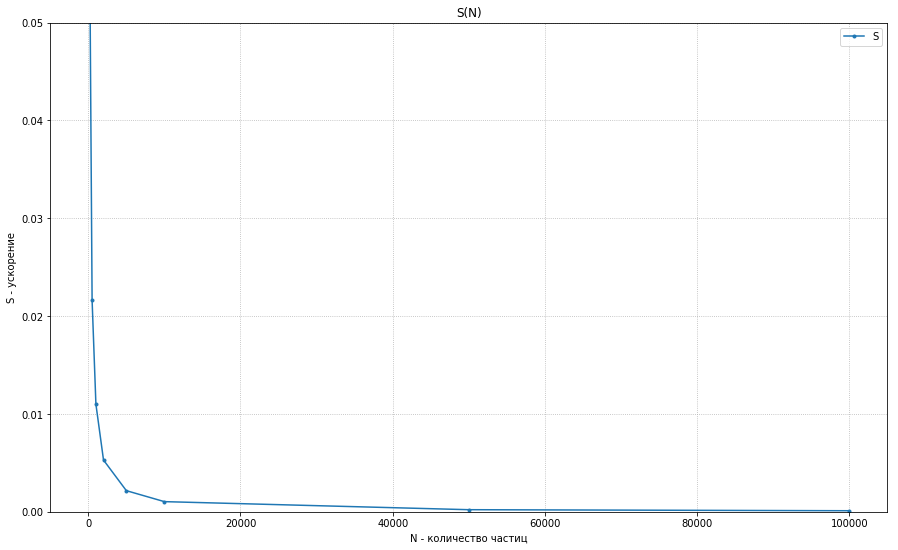

In [152]:
plt.figure(figsize=(15, 9))
plt.xlabel('N - количество частиц')
plt.ylabel('S - ускорение')
plt.title('S(N)')
plt.grid(ls=':')
plt.ylim(0, 0.05)
plt.plot(N, S, '.-', label = 'S')
plt.legend()
plt.show()

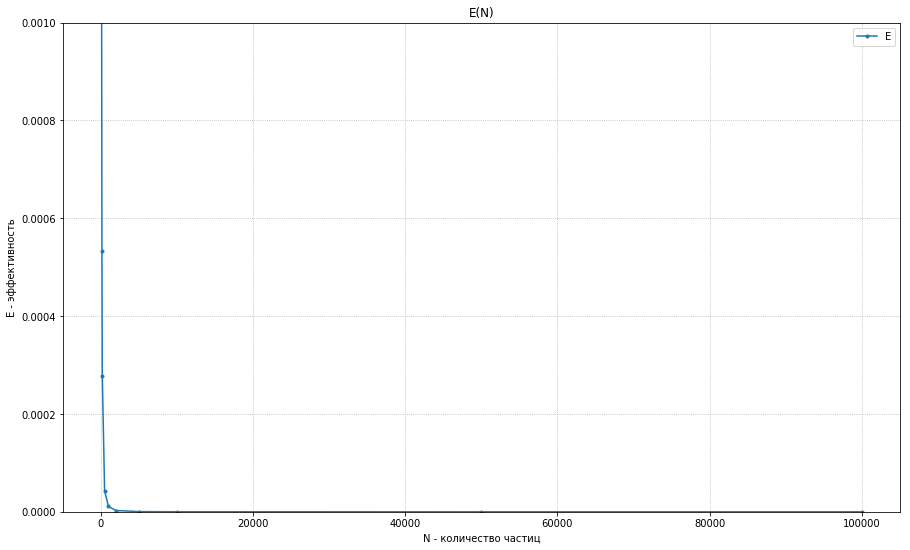

In [153]:
plt.figure(figsize=(15, 9))
plt.xlabel('N - количество частиц')
plt.ylabel('E - эффективность')
plt.title('E(N)')
plt.grid(ls=':')
plt.ylim(0, 0.001)
plt.plot(N, E, '.-', label = 'E')
plt.legend()
plt.show()

### Фиксированное $N$

Составим графики зависимости $T(P)$, $S(P)$, $E(P)$ при фиксированном $N$.

$N = 100~000$

В bash:

`$: for p in 1 2 4 8 16; do for i in {1..10}; do echo "p = $p, i = $i"; ./monte_best 0 100 50 100000 0.5 $p; done; done`


In [138]:
LOG_FILENAME = 'stats_const_n.txt'
col_names = ['pB', 't', 'T', 'a', 'b', 'x', 'N', 'p', 'P']
data = pd.read_csv(LOG_FILENAME, sep=' ', error_bad_lines=False,
warn_bad_lines=False, encoding='utf8', names=col_names)

data['T'] = data['T'].apply(lambda x: float(x[:-1]))

In [139]:
P = np.array([1, 2, 4, 8, 16])

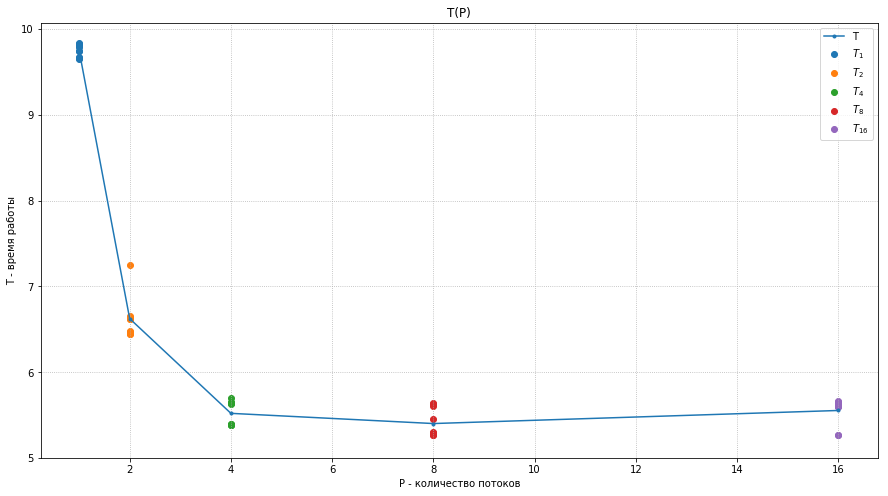

In [140]:
plt.figure(figsize=(15, 8))

T_means = []
i = 0
for datap in chunks(data['T'], 10):
    plt.scatter([P[i]]*10, datap, label="$T_{%i}$" % P[i])
    T_means.append(np.mean(datap))
    i += 1

plt.plot(P, T_means, '.-', label = 'T')

plt.xlabel('P - количество потоков')
plt.ylabel('T - время работы')
plt.title('T(P)')
plt.grid(ls=':')
plt.legend()
plt.show()

In [141]:
S = T_means[0] / T_means
E = S / P

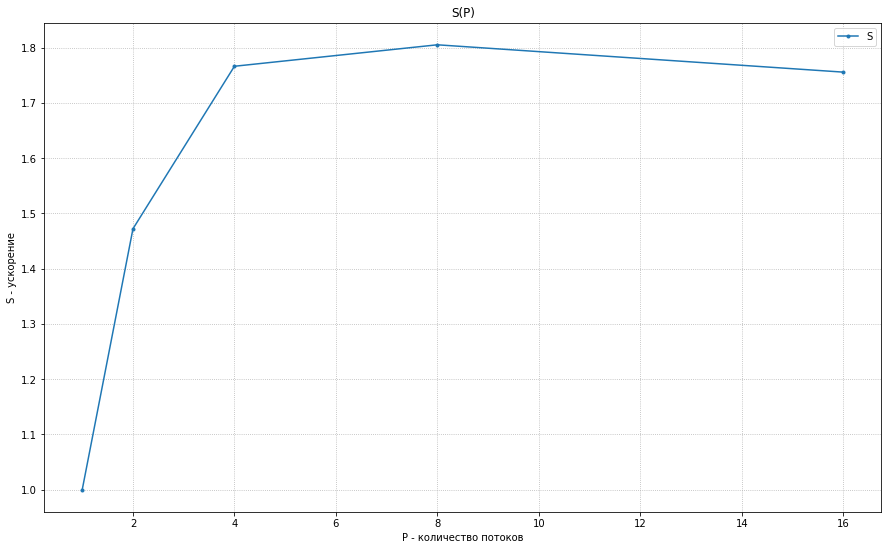

In [142]:
plt.figure(figsize=(15, 9))
plt.xlabel('P - количество потоков')
plt.ylabel('S - ускорение')
plt.title('S(P)')
plt.grid(ls=':')

plt.plot(P, S, '.-', label = 'S')
plt.legend()
plt.show()

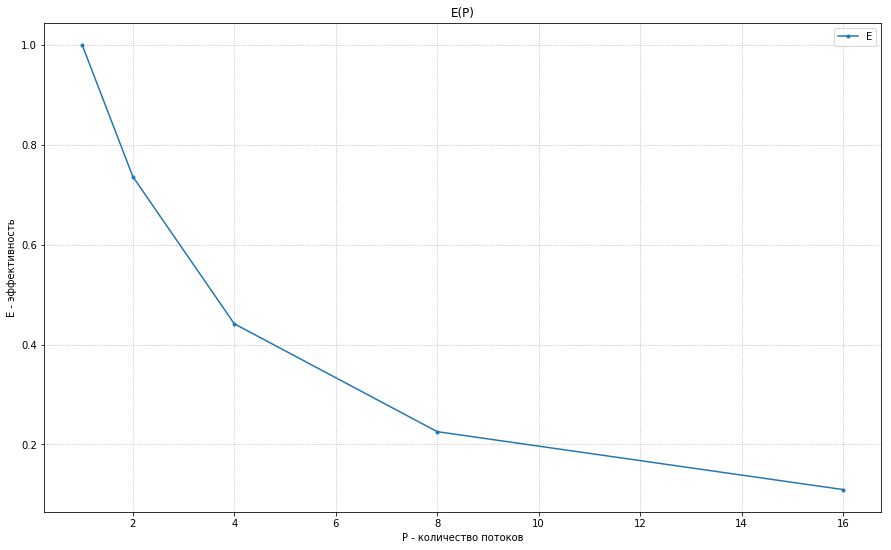

In [143]:
plt.figure(figsize=(15, 9))
plt.xlabel('P - количество потоков')
plt.ylabel('E - эффективность')
plt.title('E(P)')
plt.grid(ls=':')

plt.plot(P, E, '.-', label = 'E')
plt.legend()
plt.show()